In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import tqdm
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import OneCycleLR
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchsummary
from torchsummary import summary

## Importing all the files created 

In [2]:
!pip install pytorch-gradcam

     |████████████████████████████████| 6.0MB 25.4MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-cp36-none-any.whl size=5269 sha256=222219ba5d24126e6a3455e2c6e4289b43703e338c6eb922a1252b406dfd46d0
  Stored in directory: /root/.cache/pip/wheels/e8/1e/35/d24150a078a90ce0ad093586814d4665e945466baa89907300
Successfully built pytorch-gradcam


In [0]:
from Getting_the_Data import get_and_transform_the_data
from Displaying_the_images import display_my_images
from Model_and_summary import ResNet18, disp_summary
from train_test import train , test
from apply_grad_cam import grad_cam

## First step is to download and transform the data which here is CIFAR-10

In [4]:
train_set,test_set,train_loader,test_loader,classes = get_and_transform_the_data()

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Displaying the images in our dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

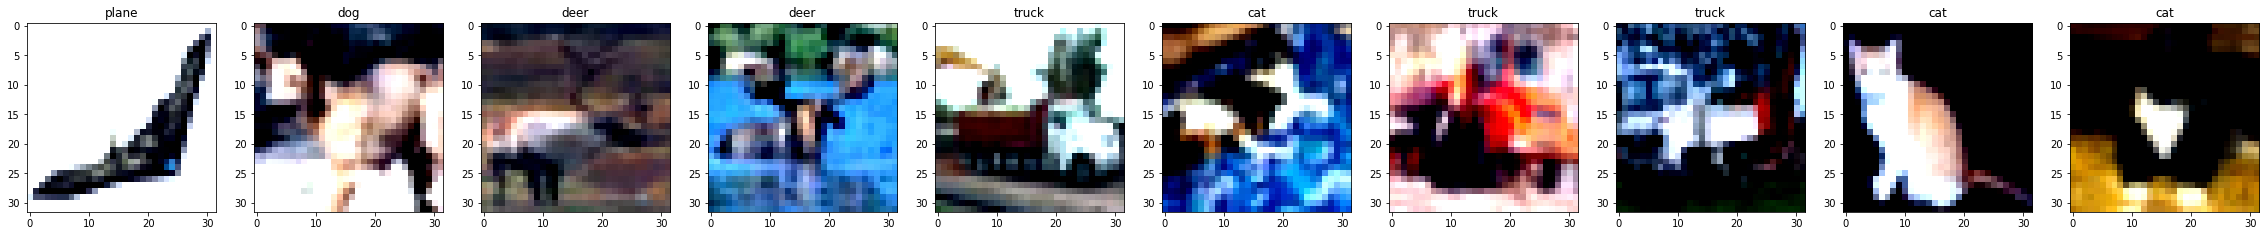

In [5]:
display_my_images(train_loader,classes)

## Moving the model for GPU usage

In [0]:
use_cuda= torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
model=ResNet18().to(device)

In [7]:
disp_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [8]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'

print(torch.cuda.is_available())

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = OneCycleLR(optimizer,max_lr=0.1,total_steps=40)

for epoch in range(1, 41):
    print(f'Epoch: {epoch} Learning_Rate {scheduler.get_lr()}')
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/391 [00:00<?, ?it/s]

True
Epoch: 1 Learning_Rate [0.0040000000000000036]


Loss=0.9655207395553589 Batch_id=390 Accuracy=51.53: 100%|██████████| 391/391 [00:53<00:00,  7.30it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5926/10000 (59.26%)

Epoch: 2 Learning_Rate [0.005944337266504118]


Loss=0.539883017539978 Batch_id=390 Accuracy=70.60: 100%|██████████| 391/391 [00:54<00:00,  7.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7238/10000 (72.38%)

Epoch: 3 Learning_Rate [0.011619830424103306]


Loss=0.7512584328651428 Batch_id=390 Accuracy=74.78: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 7520/10000 (75.20%)

Epoch: 4 Learning_Rate [0.020566684770626315]


Loss=0.670807957649231 Batch_id=390 Accuracy=77.82: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7716/10000 (77.16%)

Epoch: 5 Learning_Rate [0.03206007937590945]


Loss=0.5162845849990845 Batch_id=390 Accuracy=80.88: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8073/10000 (80.73%)

Epoch: 6 Learning_Rate [0.04516888776288231]


Loss=0.402390718460083 Batch_id=390 Accuracy=82.95: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8206/10000 (82.06%)

Epoch: 7 Learning_Rate [0.058831112237117685]


Loss=0.2946186363697052 Batch_id=390 Accuracy=85.60: 100%|██████████| 391/391 [00:55<00:00,  7.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8156/10000 (81.56%)

Epoch: 8 Learning_Rate [0.07193992062409055]


Loss=0.30213266611099243 Batch_id=390 Accuracy=87.22: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8133/10000 (81.33%)

Epoch: 9 Learning_Rate [0.08343331522937368]


Loss=0.4079854488372803 Batch_id=390 Accuracy=88.42: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8344/10000 (83.44%)

Epoch: 10 Learning_Rate [0.0923801695758967]


Loss=0.351257860660553 Batch_id=390 Accuracy=90.30: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8479/10000 (84.79%)

Epoch: 11 Learning_Rate [0.09805566273349588]


Loss=0.10492327064275742 Batch_id=390 Accuracy=91.47: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8439/10000 (84.39%)

Epoch: 12 Learning_Rate [0.1]


Loss=0.18444597721099854 Batch_id=390 Accuracy=92.56: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 8474/10000 (84.74%)

Epoch: 13 Learning_Rate [0.09968561175222017]


Loss=0.28451329469680786 Batch_id=390 Accuracy=93.68: 100%|██████████| 391/391 [00:55<00:00,  7.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8627/10000 (86.27%)

Epoch: 14 Learning_Rate [0.09874640062350874]


Loss=0.17398294806480408 Batch_id=390 Accuracy=94.21: 100%|██████████| 391/391 [00:55<00:00,  7.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8623/10000 (86.23%)

Epoch: 15 Learning_Rate [0.09719417773875232]


Loss=0.1689492017030716 Batch_id=390 Accuracy=95.01: 100%|██████████| 391/391 [00:55<00:00,  7.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8784/10000 (87.84%)

Epoch: 16 Learning_Rate [0.09504846320134738]


Loss=0.1023731380701065 Batch_id=390 Accuracy=95.63: 100%|██████████| 391/391 [00:55<00:00,  7.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8877/10000 (88.77%)

Epoch: 17 Learning_Rate [0.09233624061657436]


Loss=0.05973701551556587 Batch_id=390 Accuracy=96.15: 100%|██████████| 391/391 [00:55<00:00,  7.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8864/10000 (88.64%)

Epoch: 18 Learning_Rate [0.089091617757105]


Loss=0.07820568978786469 Batch_id=72 Accuracy=96.90:  19%|█▊        | 73/391 [00:10<00:45,  7.04it/s]

KeyboardInterrupt: ignored

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


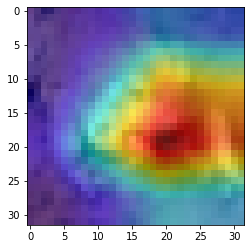

In [14]:

img=test_set.data[5]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


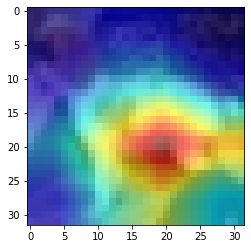

In [15]:
img=test_set.data[12]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


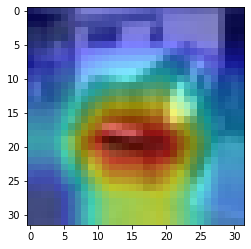

In [17]:
img=test_set.data[20]
layer= 'layer4'

cam = grad_cam(img, model, layer)
cam = torch.stack(cam)[4]
cam = np.transpose(cam, (1, 2, 0))
plt.imshow(cam)